<h1 style="text-align:center">CLassification And Clustering BANK MARKETING DATA</h1>

<p style="text-align:center">KNN , SVM , RF , DT & KMeans</p>

                                                             -- Lakhder Amine --

## Dependencies

In [4]:
import pandas as pd
import numpy as np

from module.BankMarketingDataProcessor import BankMarketingDataProcessor
from module.BankMarketingDataSerializer import BankMarketingDataSerializer
from module.BankMarketingDataLearner import BankMarketingDataLearner

from sklearn import manifold

import pickle
import matplotlib.pyplot as plt


## Overiew

- Objective : Classify and Cluster the Bank Marketing Data using K-Means , Knn , Decision Tree , Random Forest , SVM.

- Architecture :


![STRUCTURE](structure.jpg)

## Bank Marketing Dataset

In [5]:
data = pd.read_csv("data/bank.csv",sep=";")

viusalize the data

In [110]:
data.tail(25)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4376,42,blue-collar,married,primary,no,-10,yes,no,unknown,9,may,291,4,-1,0,unknown,no
4377,31,blue-collar,married,secondary,no,-617,yes,no,unknown,2,jun,115,2,-1,0,unknown,no
4378,59,housemaid,divorced,primary,no,195,no,no,unknown,5,may,366,2,-1,0,unknown,no
4379,41,blue-collar,married,primary,no,1172,yes,no,unknown,15,may,153,1,-1,0,unknown,no
4380,57,housemaid,married,secondary,no,0,no,no,cellular,22,aug,197,2,-1,0,unknown,no
4381,43,services,divorced,secondary,no,0,no,no,cellular,31,jul,106,4,-1,0,unknown,no
4382,30,services,divorced,secondary,no,-94,yes,no,cellular,14,jul,41,2,-1,0,unknown,no
4383,26,admin.,single,secondary,no,609,no,no,telephone,28,jan,112,1,-1,0,unknown,no
4384,52,management,single,tertiary,no,4,no,yes,cellular,28,jul,30,9,-1,0,unknown,no
4385,32,entrepreneur,divorced,secondary,no,1121,yes,yes,cellular,16,apr,211,3,-1,0,unknown,no


## Constructing Bank Data Objects

-  `BankDataProcessor`: A data preprocessor module.
-  `BankDataSerializer`: A object serializer module.
-  `BankDataLearner`: The main bank data module.

In [8]:
BankDataProcessor = BankMarketingDataProcessor(data=data)
BankDataSerializer = BankMarketingDataSerializer(serializer=pickle)

BankDataLearner = BankMarketingDataLearner(processor=BankDataProcessor,serializer=BankDataSerializer)

## Visualize pre-processed data

In [9]:
pre_processed_data = pd.read_csv("data/pre_processed_bank_data.csv",index_col=0)

pre_processed_data.tail(5)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_27,day_28,day_29,day_30,day_31,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
4396,41,0,239,1,368,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,no
4397,35,305,7,7,367,25,0,1,0,0,...,0,0,0,0,0,1,0,0,0,no
4398,57,31,260,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,no
4399,29,452,347,1,-1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,no
4400,48,5,697,2,-1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,no


## Clustering Bank Marketing Data

### Scatter Plot function ploting

In [10]:
colors = np.array(['orange', 'blue', 'lime', 'blue', 'khaki', 'pink', 'green', 'purple'])

def clustering_scatterplot(points=None, labels=None, centers=None, title=None):
    
    n_clusters = np.unique(labels).size
    for i in range(n_clusters):
        h = plt.scatter(points[labels==i,0],
                        points[labels==i,1], 
                        c=colors[i%colors.size],
                        label = 'cluster '+str(i))

    if centers is not None:
        plt.scatter(centers[:,0], centers[:,1], c='r', marker='*', s=500)

    _ = plt.title(title)
    _ = plt.legend()
    _ = plt.xlabel('x')
    _ = plt.ylabel('y')

### Loading Pre-Trained Models

In [11]:
KMeans_model = BankDataSerializer.load(filepath="./model/cluster/KmeansModel.saved")

### Append centers to the data

In [16]:
clustering_data = pd.read_csv("data/clustering_bank_data.csv",index_col=0)
data_values = np.array(clustering_data.values,dtype=float)
data_and_centers = np.r_[data_values,KMeans_model.cluster_centers_]

### 2D Projection of data and model

In [17]:
XYcoordinates = manifold.MDS(n_components=2).fit_transform(data_and_centers)

### Plot the data examples with centers

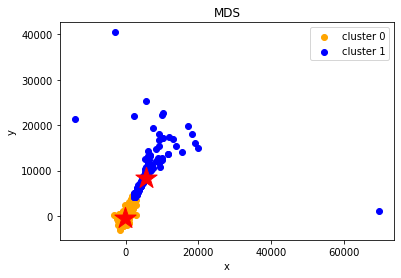

In [112]:
clustering_scatterplot(points=XYcoordinates[:-2,:],labels=KMeans_model.labels_,centers=XYcoordinates[-2:,:],title='MDS')

### Concat cluster tragets with data

In [113]:
clustering_data['cluster'] = pd.Series(KMeans_model.labels_, index=clustering_data.index)

### Display the data with cluster targets

In [26]:
clustering_data.head(25)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_27,day_28,day_29,day_30,day_31,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cluster
0,30,1787,79,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,33,4789,220,1,339,4,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,35,1350,185,1,330,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,30,1476,199,4,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,59,0,226,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
5,35,747,141,2,176,3,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
6,36,307,341,1,330,2,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,39,147,151,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
8,41,221,57,2,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
9,43,-88,313,1,147,2,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [25]:
clustering_data.tail(25)

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,day_27,day_28,day_29,day_30,day_31,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,cluster
4376,42,-10,291,4,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4377,31,-617,115,2,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4378,59,195,366,2,-1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4379,41,1172,153,1,-1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4380,57,0,197,2,-1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4381,43,0,106,4,-1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4382,30,-94,41,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4383,26,609,112,1,-1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4384,52,4,30,9,-1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4385,32,1121,211,3,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


## Classifying Bank Marketing Data

### Loading Pre-Trained Models

In [27]:
knn_model = BankDataSerializer.load(filepath="./model/classifier/KNeighborsModel.saved")
svm_model = BankDataSerializer.load(filepath="./model/classifier/SVMModel.saved")
decision_tree_model = BankDataSerializer.load(filepath="./model/classifier/DecisionTreeModel.saved")
random_forest_model = BankDataSerializer.load(filepath="./model/classifier/RandomForestModel.saved")

### Evaluate the models

<h5 style="color:#44ff22">KNeighbors</h5>

In [33]:
knn_accuracy,knn_precision,knn_f1_score,knn_recall = BankDataLearner.evaluate(estimator=knn_model)

print("KNN accuracy:",knn_accuracy)
print("KNN precision:",knn_precision)
print("KNN f1 score:",knn_f1_score)
print("KNN recall:",knn_recall)

KNN accuracy: 0.8751891074130106
KNN precision: 0.4090909090909091
KNN f1 score: 0.24657534246575347
KNN recall: 0.17647058823529413


<h5 style="color:#ff4422">SVM</h5>

In [35]:
svm_accuracy,svm_precision,svm_f1_score,svm_recall = BankDataLearner.evaluate(estimator=svm_model)

print("SVM accuracy:",svm_accuracy)

c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM accuracy: 0.8842662632375189


<h5 style="color:#ff7711">RandomForest</h5>

In [36]:
rf_accuracy,rf_precision,rf_f1_score,rf_recall = BankDataLearner.evaluate(estimator=random_forest_model)

print("Random Forest accuracy:",rf_accuracy)
print("Random Forest precision:",rf_precision)
print("Random Forest f1 score:",rf_f1_score)
print("Random Forest recall:",rf_recall)

Random Forest accuracy: 0.8857791225416036
Random Forest precision: 0.75
Random Forest f1 score: 0.03821656050955414
Random Forest recall: 0.0196078431372549


<h5 style="color:#4488ff">DecisionTree</h5>

In [37]:
dt_accuracy,dt_precision,dt_f1_score,dt_recall = BankDataLearner.evaluate(estimator=decision_tree_model)

print("Decision Tree accuracy:",dt_accuracy)
print("Decision Tree precision:",dt_precision)
print("Decision Tree f1 score:",dt_f1_score)
print("Decision Tree recall:",dt_recall)

Decision Tree accuracy: 0.8774583963691377
Decision Tree precision: 0.4666666666666667
Decision Tree f1 score: 0.43749999999999994
Decision Tree recall: 0.4117647058823529


### Compare the models

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


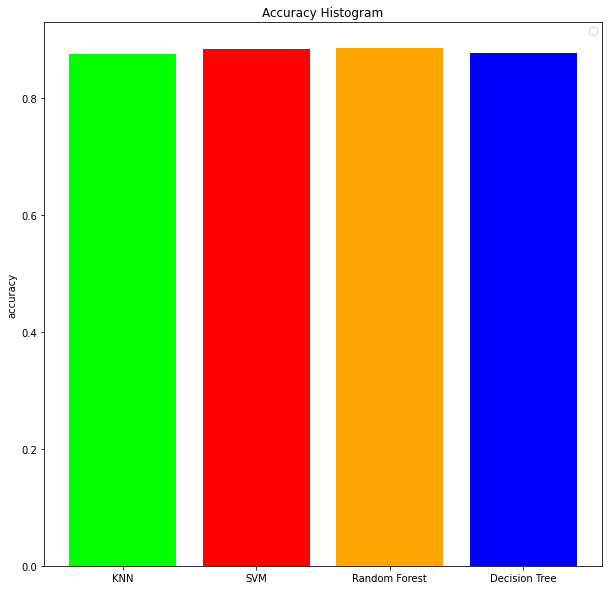

In [46]:
accuracy_list = [knn_accuracy,svm_accuracy,rf_accuracy,dt_accuracy]

plt.figure(figsize=(10,10))
plt.bar(['KNN','SVM','Random Forest','Decision Tree'],accuracy_list,color=['lime','red','orange','blue'])
plt.ylabel('accuracy')
plt.title('Accuracy Histogram')
plt.legend()
plt.show()


### Predict new data

In [52]:
prediction_data = pd.read_csv("data/prediction_bank_data.csv",index_col=0)

prediction_data.head(5)

,38,7929,182,3,-1,0,0.1,0.2,1,0.3,...,0.57,0.58,0.59,0.60,0.61,0.62,0.63,0.64,0.65,1.9
4401,,,,,,,,,,,,,,,,,,,,,
4402,41,39,549,2,-1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4403,39,267,1151,5,-1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4404,31,4945,445,1,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4405,51,463,213,5,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4406,35,2116,409,2,-1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### True data targets

In [106]:
rdt = pd.read_csv("data/y_to_pedict.csv",sep=";")

rdt = rdt.iloc[:,rdt.shape[1]-1]

rdt_array = np.array(rdt)

rdt_array

array(['yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no'],
      dtype=object)

- KNN Predicted data targets

In [54]:
print(BankDataLearner.predict(estimator=knn_model,X=prediction_data))

['no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no']


c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -1
- 0
- 0.1
- 0.10
- 0.11
- ...
Feature names seen at fit time, yet now missing:
- age
- balance
- campaign
- contact_cellular
- contact_telephone
- ...

  warnings.warn(message, FutureWarning)


- SVM Predicted data targets

In [107]:
print(BankDataLearner.predict(estimator=svm_model,X=prediction_data))

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no']


c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -1
- 0
- 0.1
- 0.10
- 0.11
- ...
Feature names seen at fit time, yet now missing:
- age
- balance
- campaign
- contact_cellular
- contact_telephone
- ...

  warnings.warn(message, FutureWarning)


- Random Forest Predicted data targets

In [108]:
print(BankDataLearner.predict(estimator=random_forest_model,X=prediction_data))

['no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no']


c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -1
- 0
- 0.1
- 0.10
- 0.11
- ...
Feature names seen at fit time, yet now missing:
- age
- balance
- campaign
- contact_cellular
- contact_telephone
- ...

  warnings.warn(message, FutureWarning)


- Decision Tree Predicted data targets

In [109]:
print(BankDataLearner.predict(estimator=decision_tree_model,X=prediction_data))

['no' 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no'
 'yes' 'yes' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'no'
 'no' 'no' 'no' 'no' 'yes' 'yes' 'no' 'no' 'yes' 'no' 'no' 'no' 'no' 'yes'
 'no' 'no' 'no' 'no' 'no' 'no' 'no']


c:\Users\amine\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- -1
- 0
- 0.1
- 0.10
- 0.11
- ...
Feature names seen at fit time, yet now missing:
- age
- balance
- campaign
- contact_cellular
- contact_telephone
- ...

  warnings.warn(message, FutureWarning)
